<a href="https://colab.research.google.com/github/saraswathykrk/meat_data/blob/main/code_files/Output_Forecast_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/saraswathykrk/meat_data/blob/main/data_files/images.jpeg?raw=true" width="630" height="450" />

# LINEAR REGRESSION

## Table of Content

1. [Goal](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Introduction to Linear Regression](#section4)<br>
    - 4.1 [Linear Regression Equation with Errors in consideration](#section401)<br>
        - 4.1.1 [Assumptions of Linear Regression](#sectionassumptions)<br>
    - 4.2 [Preparing X and y using pandas](#section402)<br>
    - 4.3 [Splitting X and y into training and test datasets](#section403)<br>
    - 4.4 [Linear regression in scikit-learn](#section404)<br>
    - 4.5 [Interpreting Model Coefficients](#section405)<br>
    - 4.3 [Using the Model for Prediction](#section406)<br>
5. [Model evaluation](#section5)<br>
    - 5.1 [Model evaluation using metrics](#section501)<br>
    - 5.2 [Model Evaluation using Rsquared value.](#section502)<br>
6. [Feature Selection](#section6)<br>
7. [Handling Categorical Features](#section7)<br>

<a id=section1></a>

## 1. Goal

1.   __Total_CO2_emission__ (in metric tonnes) for a particular country as a __function__ of __Total Meat Consumption__ (in tonnes).
2.   __Total_water_use__ (in litres) for a particular country as a __function__ of __Total Meat Consumption__ (in tonnes).
3.   __Total_land_use__ (in hectares) for a particular country as a __function__ of __Total Meat Consumption__ (in tonnes).


- We have to find a function that, given the input for each country (i.e., the predicted values for the next 13/14 years) for __Total_Meat_Consumption__, __predicts the output Total_CO2_emission, Total_water_use, Total_land_use__.

- Visualize the __relationship__ between the _input features_ and the _output response_ using scatter plots.

<a id=section3></a>

## 2. Data Loading and Description

The dataset captures Total_CO2_emission generated, Total_land_use, Total_water_use for each country and its relation to the Total_Meat_Consumption.
- Total_Meat_Consumption        
- Total_CO2_emission
- Total_population
- Total_land_use
- Total_water_use

__Importing Packages__

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import StandardScaler
# allow plots to appear directly in the notebook
%matplotlib inline
from google.colab import files

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

#### Importing the Dataset

In [ ]:
dataset_final = pd.read_csv('https://raw.githubusercontent.com/saraswathykrk/meat_data/main/data_files/top_25_countries_predictions.csv')
dataset_final.head()

,Entity,Year,Total_population,Total_Meat_Consumption,Total_water_use,Total_land_use,Total_CO2_emission
0,Argentina,1961,20817000.0,2.123959e+09,1408098.94,15045.688071,5.112671e+07
1,Argentina,1962,21153000.0,2.179605e+09,1437861.88,15375.845498,5.364013e+07
2,Argentina,1963,21489000.0,2.209499e+09,1438320.81,15315.252692,5.003266e+07
3,Argentina,1964,21824000.0,1.812920e+09,1115435.61,11868.370963,5.567004e+07
4,Argentina,1965,22160000.0,1.987530e+09,1170954.90,12310.403641,5.880485e+07


In [ ]:
dataset1 = dataset_final.copy()
dataset2 = dataset_final.copy()


filter = dataset2['Year']>2018

dataset2.where(dataset2['Year']>2017, inplace = True)

list_countries = dataset2['Entity'].dropna().unique().tolist()
print('list of countries:',list_countries)
country_name = list_countries[0]

reg_dict = {}

excel = False

data1 = dataset_final.loc[dataset_final.Entity == country_name].copy()
data1 = data1.sort_values(by=['Year'], ascending=True)

data_year = data1.copy()

data1 = data1.drop(["Year"], axis = 1)

data = data1.copy()
data_bkup = data1.copy()

data = data[:-14]
data.tail()

list of countries: ['Canada', 'China', 'Germany', 'India', 'Indonesia', 'Iran', 'Japan', 'Russia', 'South Korea', 'United States']


,Entity,Total_population,Total_Meat_Consumption,Total_water_use,Total_land_use,Total_CO2_emission
223,Canada,35297000.0,3.203556e+09,770031.14,5631.753474,5.773464e+08
224,Canada,35664000.0,3.186578e+09,744117.27,5340.529564,5.773596e+08
225,Canada,36027000.0,3.284942e+09,744233.63,5202.790123,5.767569e+08
226,Canada,36383000.0,3.049987e+09,638398.87,4138.392874,5.640684e+08
227,Canada,36732000.0,3.034431e+09,603377.30,3686.734309,5.711389e+08


What are the **features**?
- Total_Meat_Consumption: Total_Meat_Consumption for a country for the past 50 years and predicted values for the next ten years (in tonnes)

What is the **response**?
- Total_CO2_emission: Total_CO2_emission for a country (in tonnes)
- Total_land_use: Total_land_use for a country (in hectares)
- Total_water_use: Total_water_use for a country (in litres)

<a id=section3></a>

## 3. Exploratory Data Analysis

In [ ]:
data.shape

(57, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 171 to 227
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Entity                  57 non-null     object 
 1   Total_population        57 non-null     float64
 2   Total_Meat_Consumption  57 non-null     float64
 3   Total_water_use         57 non-null     float64
 4   Total_land_use          57 non-null     float64
 5   Total_CO2_emission      57 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.1+ KB


In [ ]:
data.describe()

,Total_population,Total_Meat_Consumption,Total_water_use,Total_land_use,Total_CO2_emission
count,5.700000e+01,5.700000e+01,5.700000e+01,57.000000,5.700000e+01
mean,2.730025e+07,2.558415e+09,8.631218e+05,6703.554281,4.508028e+08
std,5.326654e+06,5.298316e+08,8.364190e+04,1050.977283,1.137284e+08
min,1.823400e+07,1.433739e+09,6.033773e+05,3686.734309,1.940007e+08
25%,2.305900e+07,2.204440e+09,8.180617e+05,6106.689025,3.967727e+08
50%,2.717900e+07,2.537899e+09,8.624245e+05,6674.044257,4.556080e+08
75%,3.148800e+07,3.097953e+09,9.228562e+05,7432.302070,5.642309e+08
max,3.673200e+07,3.284942e+09,1.066157e+06,9204.280379,5.947321e+08


There are 57 **observations**, which we will use for training the model and remaining 14 years predicted values of **Total_Meat_Consumption**, we will use for predicting the __Total_CO2_emission__, __Total_water_use__, __Total_land_use__ for the country.

__Distribution of Features__

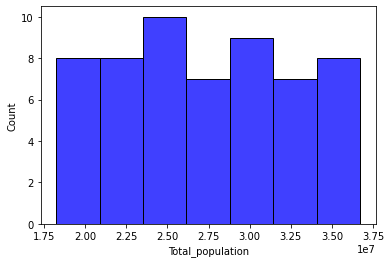

In [ ]:
sns.histplot(data.Total_population, color="b")

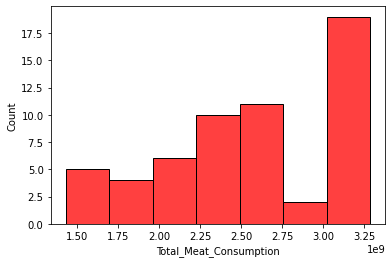

In [ ]:
sns.histplot(data.Total_Meat_Consumption, color="r")

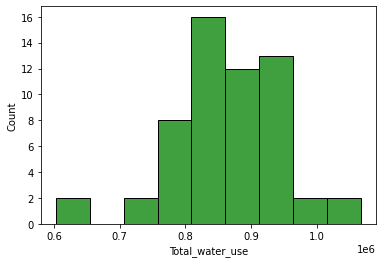

In [ ]:
sns.histplot(data.Total_water_use, color="g")

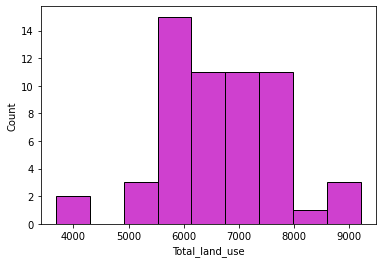

In [ ]:
sns.histplot(data.Total_land_use, color="m")

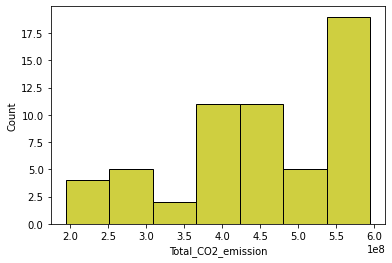

In [ ]:
sns.histplot(data.Total_CO2_emission, color="y")

### Is there a relationship between Total_CO2_emission and Total_Meat_Consumption, between Total_land_use and Total_Meat_Consumption, and between Total_water_use and Total_Meat_Consumption?

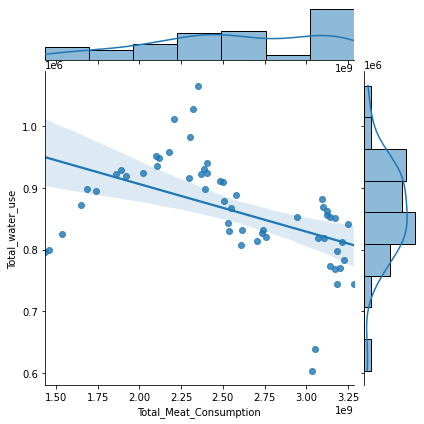

In [ ]:
JG1 = sns.jointplot("Total_Meat_Consumption", "Total_water_use", data=data, kind='reg')

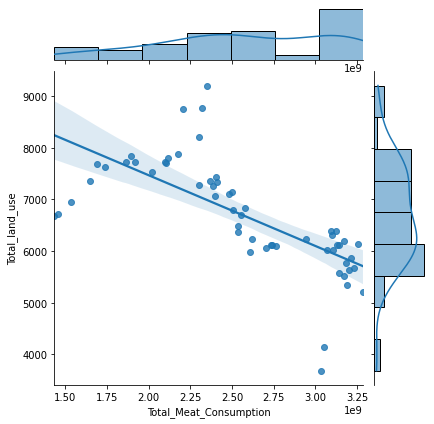

In [ ]:
JG2 = sns.jointplot("Total_Meat_Consumption", "Total_land_use", data=data, kind='reg')

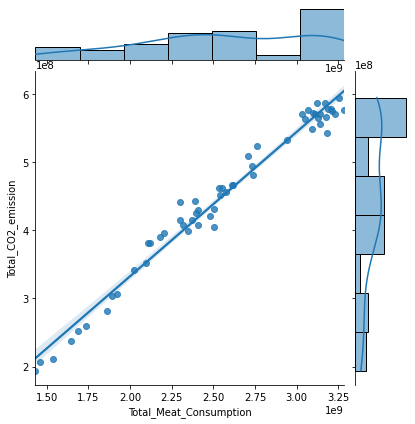

In [ ]:
JG3 = sns.jointplot("Total_Meat_Consumption", "Total_CO2_emission", data=data, kind='reg')

__Observation__<br/>
_Total_CO2_emission and Total_Meat_Consumption_ is __not__ highly correlated.
_Total_water_use and Total_Meat_Consumption_ is highly correlated.
_Total_land_use and Total_Meat_Consumption_ is correlated.

### Visualising Pairwise correlation

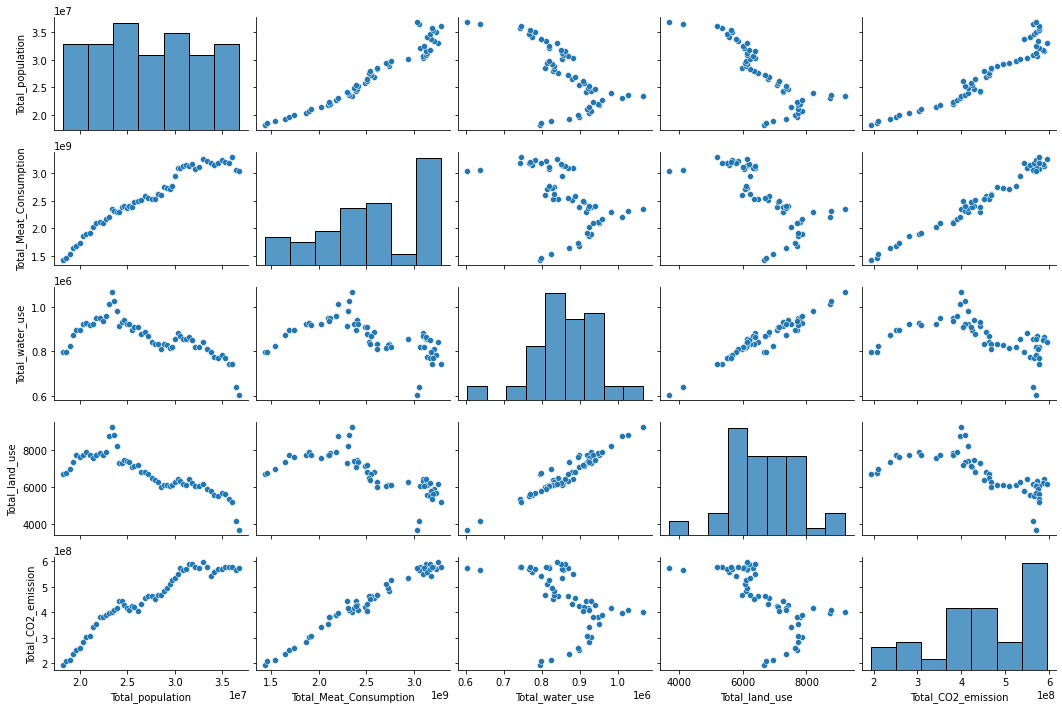

In [ ]:
sns.pairplot(data, height = 2, aspect = 1.5)

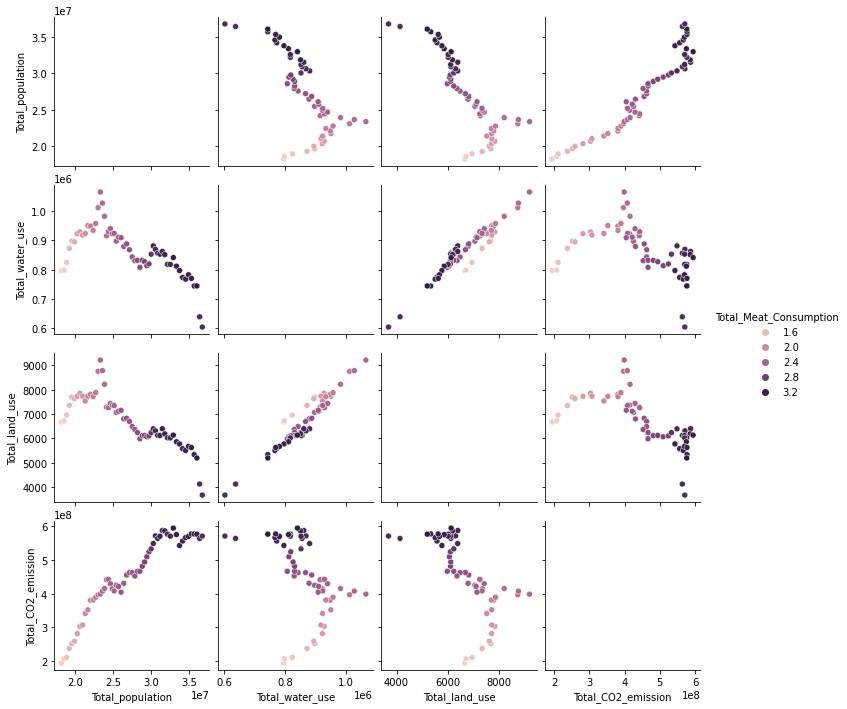

In [ ]:
sns.pairplot(data, hue = "Total_Meat_Consumption")

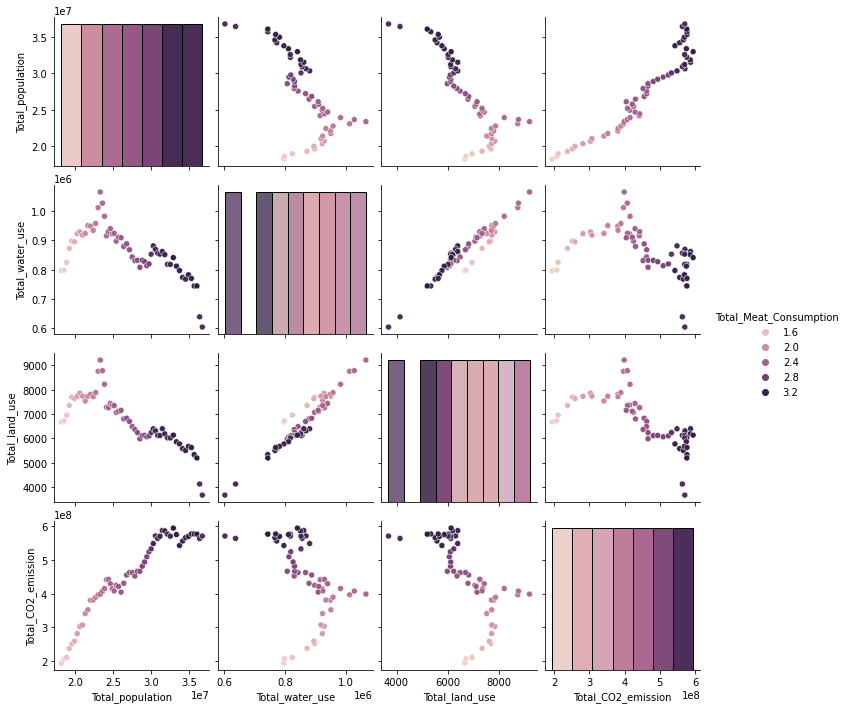

In [ ]:
sns.pairplot(data,hue="Total_Meat_Consumption", diag_kind="hist")

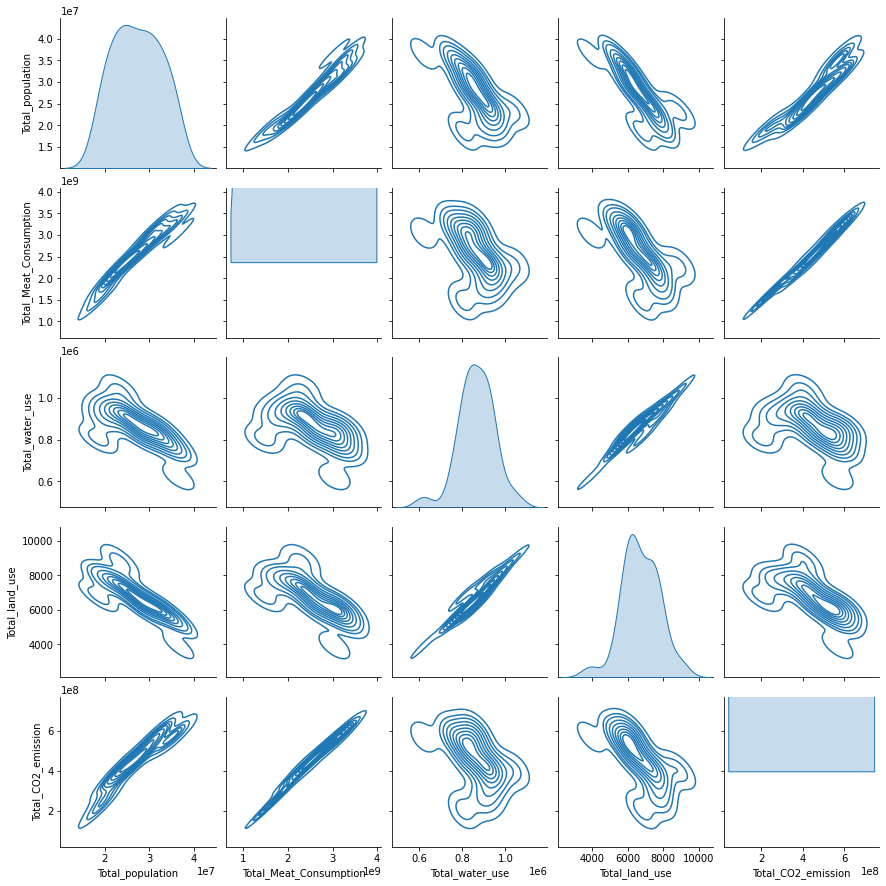

In [ ]:
sns.pairplot(data,kind="kde")

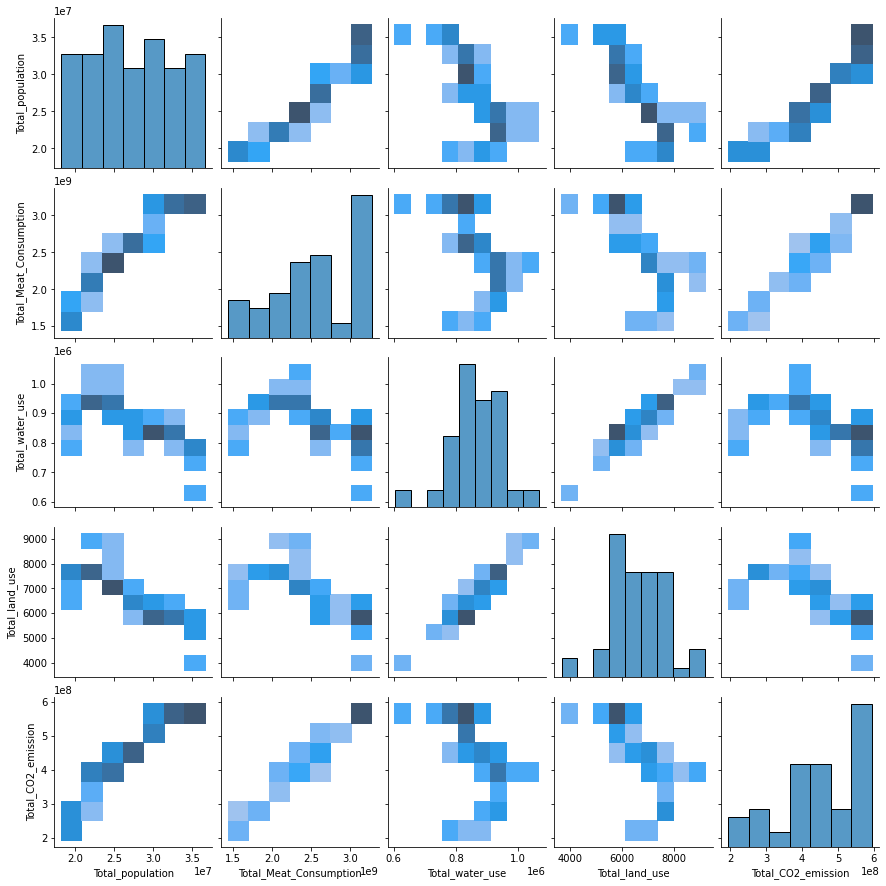

In [ ]:
sns.pairplot(data, kind = 'hist')

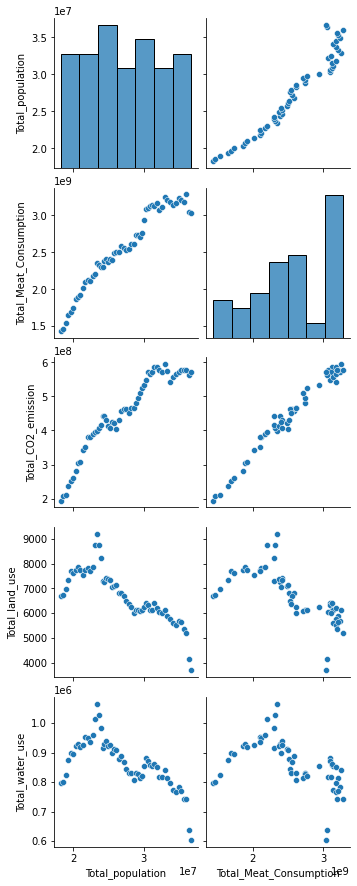

In [ ]:
sns.pairplot(
    data,
    x_vars=["Total_population","Total_Meat_Consumption"],
    y_vars=["Total_population","Total_Meat_Consumption","Total_CO2_emission", "Total_land_use","Total_water_use"],
)

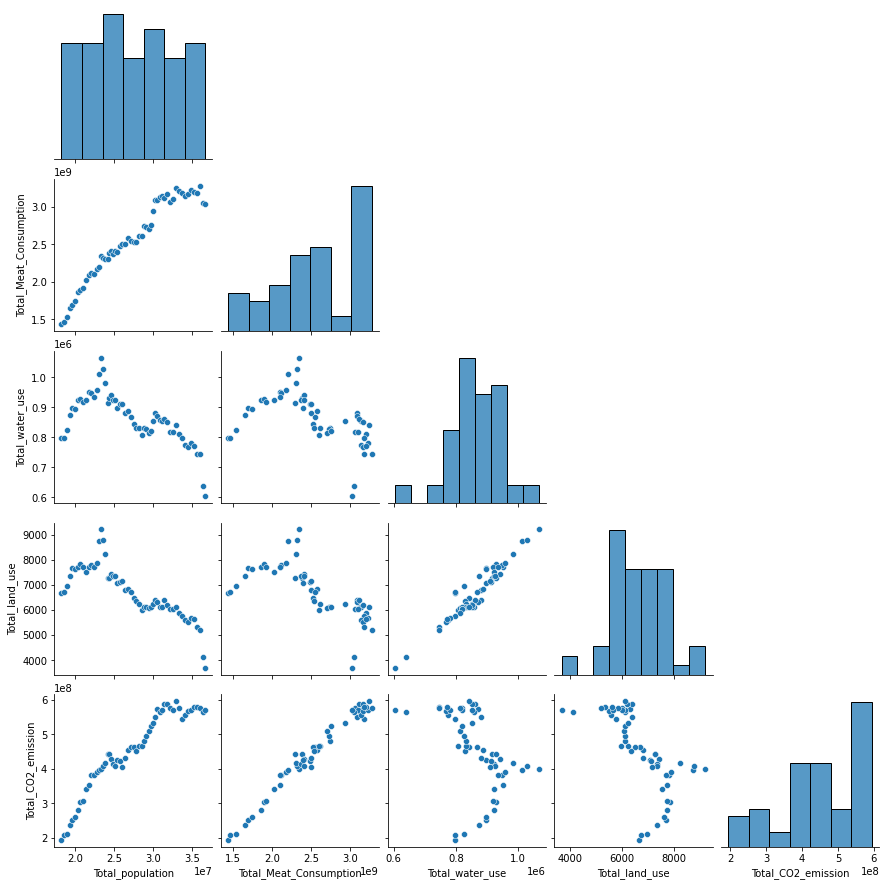

In [ ]:
sns.pairplot(data, corner=True)

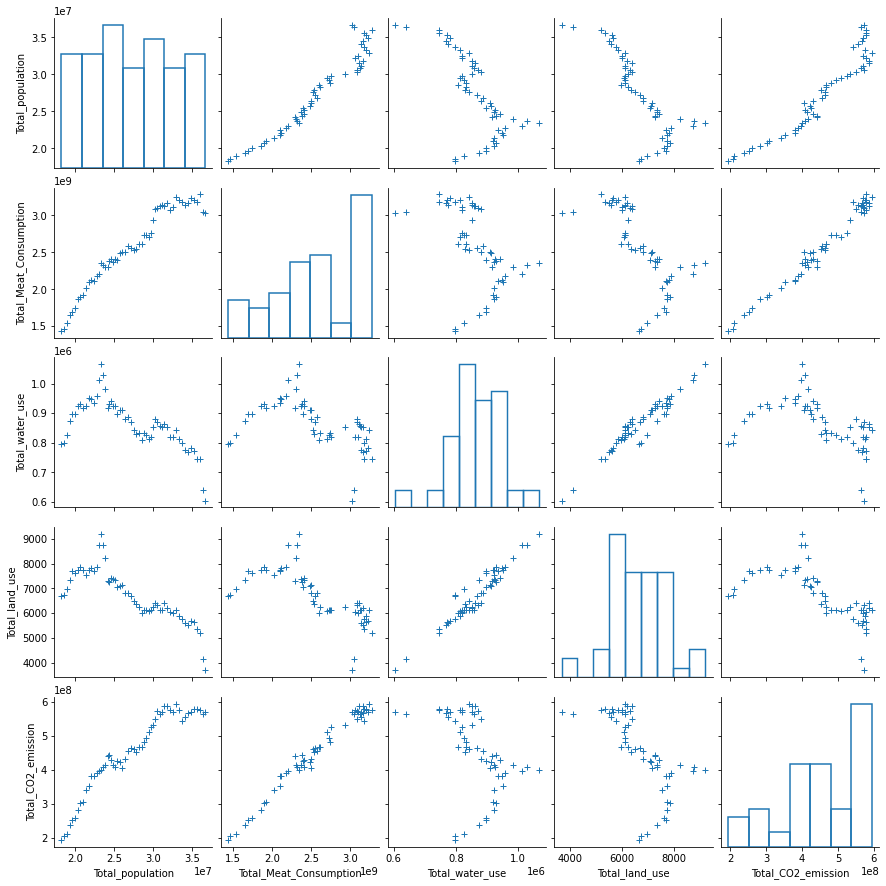

In [ ]:
sns.pairplot(
    data,
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
)

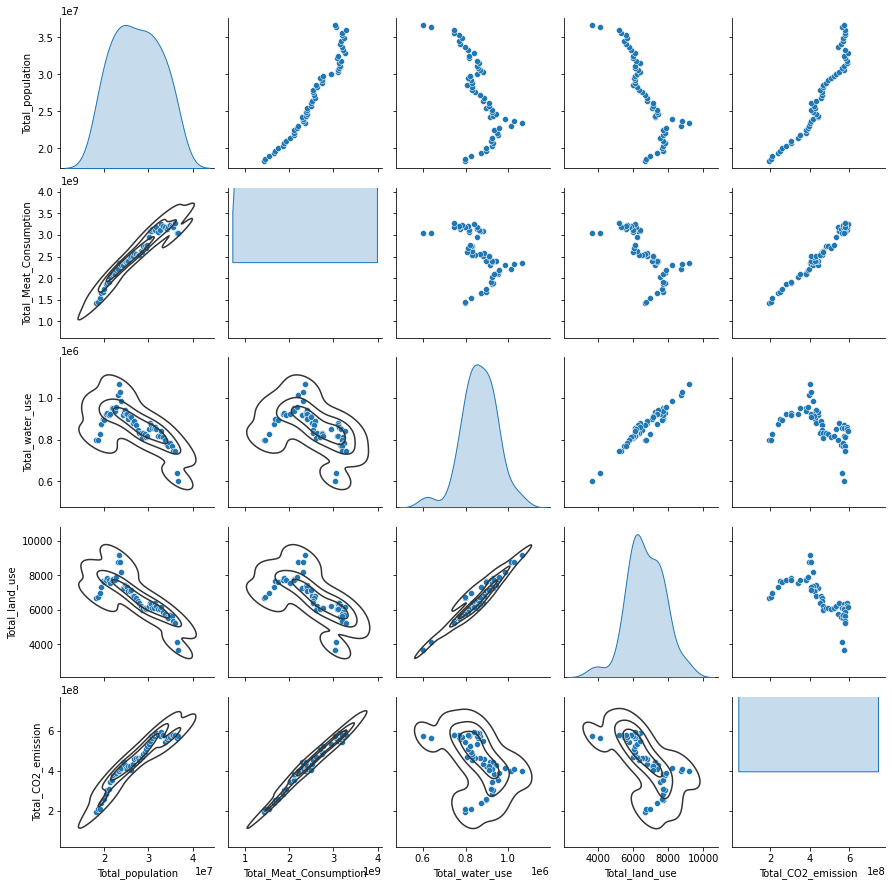

In [ ]:
g = sns.pairplot(data, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

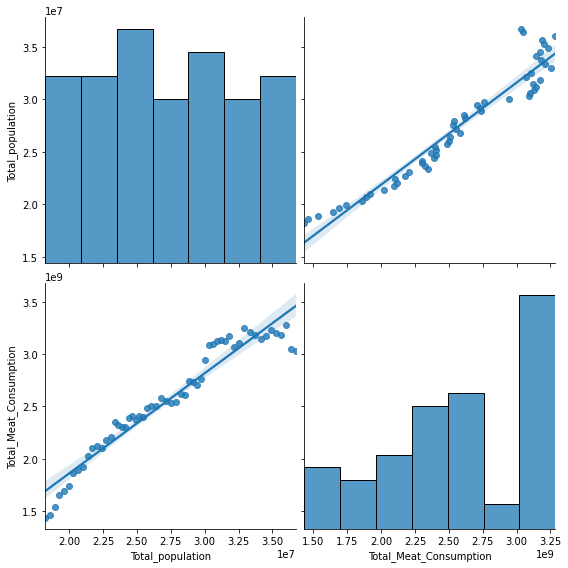

In [ ]:
sns.pairplot(data, x_vars=["Total_population","Total_Meat_Consumption"],
    y_vars=["Total_population","Total_Meat_Consumption"],
    height=4, aspect=1, kind='reg')

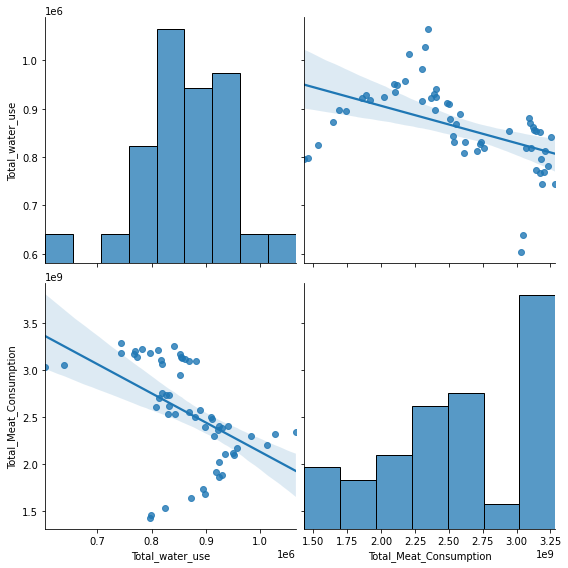

In [ ]:
sns.pairplot(data, x_vars=["Total_water_use","Total_Meat_Consumption"],
    y_vars=["Total_water_use","Total_Meat_Consumption"],
    height=4, aspect=1, kind='reg')

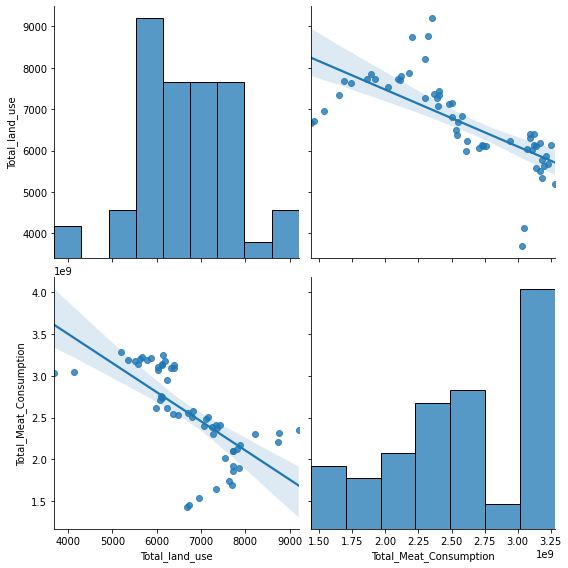

In [ ]:
sns.pairplot(data, x_vars=["Total_land_use","Total_Meat_Consumption"],
    y_vars=["Total_land_use","Total_Meat_Consumption"],
    height=4, aspect=1, kind='reg')

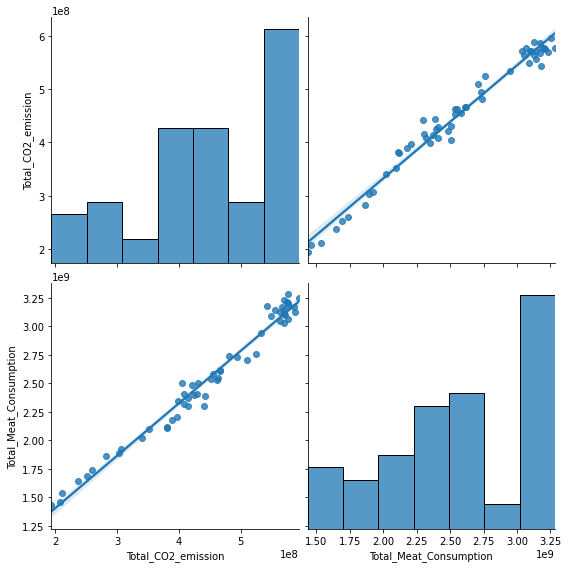

In [ ]:
sns.pairplot(data, x_vars=["Total_CO2_emission","Total_Meat_Consumption"],
    y_vars=["Total_CO2_emission","Total_Meat_Consumption"],
    height=4, aspect=1, kind='reg')

__Observation__

- Strong relationship between Total_Meat_Consumption ads and Total_CO2_emission
- Weak relationship between Total_Meat_Consumption and Total_land_use
- Strong relationship between Total_Meat_Consumption and Total_water_use
- Weak relationship between Total_Meat_Consumption and Total_population



### Calculating and plotting heatmap correlation

In [ ]:
data.corr()

,Total_population,Total_Meat_Consumption,Total_water_use,Total_land_use,Total_CO2_emission
Total_population,1.000000,0.965079,-0.677564,-0.824771,0.947564
Total_Meat_Consumption,0.965079,1.000000,-0.488780,-0.690365,0.988003
Total_water_use,-0.677564,-0.488780,1.000000,0.959250,-0.455289
Total_land_use,-0.824771,-0.690365,0.959250,1.000000,-0.664227
Total_CO2_emission,0.947564,0.988003,-0.455289,-0.664227,1.000000


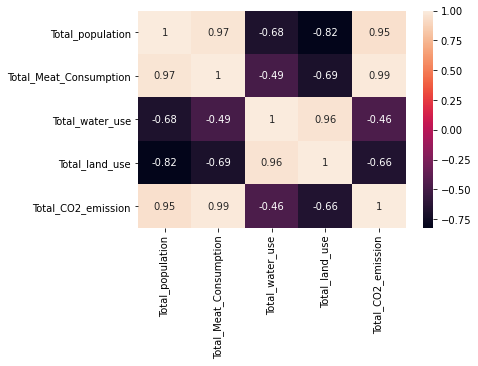

In [ ]:
sns.heatmap( data.corr(), annot=True );

__Observation__

- The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. You can observe that the correlation between __Total_Meat_Consumption and Total_CO2_emission is high, i.e. 0.96__ and then between __Total_Meat_Consumption and Total_water_use is 1__ and between __Total_Meat_Consumption and Total_population is 0.92__ and between __Total_Meat_Consumption and Total_land_use is also 1__.

- Correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with __strong correlations__ are mostly probably candidates for __model building__.


<a id=section4></a>

## 4. Linear Regression

__Linear regression__ is a _basic_ and _commonly_ used type of __predictive analysis__.  The overall idea of regression is to examine two things: 
- Does a set of __predictor variables__ do a good job in predicting an __outcome__ (dependent) variable?  
- Which variables in particular are __significant predictors__ of the outcome variable, and in what way they do __impact__ the outcome variable?  

These regression estimates are used to explain the __relationship between one dependent variable and one or more independent variables__.  The simplest form of the regression equation with one dependent and one independent variable is defined by the formula :<br/>
$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x


Three major uses for __regression analysis__ are: 
- determining the __strength__ of predictors,
    - Typical questions are what is the strength of __relationship__ between _dose and effect_, __Total_CO2_emission and Total_Meat_Consumption__, or _age and income_.
- __forecasting__ an effect, and
    - how much __additional Total_CO2_emission is released__ for each additional 1000 tonnes increase in Meat consumption for each country?
    - how much __additional land has been used__ for each additional 1000 tonnes increase in Meat consumption for each country?
    - how much __additional water has been used__ for each additional 1000 tonnes increase in Meat consumption for each country?
- __trend__ forecasting.
    - what will the __Total_CO2_emission__ be for the next _10 years_?
    - what will the __Total_land_use__ be for the next _10 years_?
    - what will the __Total_water_use__ be for the next _10 years_?

<a id=section401></a>

### 4.1 Linear Regression Equation with Errors in consideration

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):


How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$ = 0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

<a id = sectionassumptions></a>

#### 4.1.1 Assumptions of Linear Regression

1. There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.
2. There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.
3. The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.
4. The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
5. The error terms must be normally distributed.

<a id=section402></a>

## 5. Predicting **Total_CO2_emission**

### 5.1 Preparing X and y using pandas for Total_CO2_emission

- __Standardization__. <br/>
Standardize features by removing the _mean_ and scaling to _unit standard deviation_.

In [ ]:
data = data1.drop(["Entity","Total_population",	"Total_land_use","Total_water_use"], axis = 1)
data.head()

,Total_Meat_Consumption,Total_CO2_emission
171,1.433739e+09,1.940007e+08
172,1.459121e+09,2.069908e+08
173,1.536277e+09,2.109108e+08
174,1.647432e+09,2.375777e+08
175,1.688008e+09,2.519170e+08


In [ ]:
scaler = StandardScaler().fit(data)
data1 = scaler.transform(data)

In [ ]:
data = pd.DataFrame(data1)
data.tail()

,0,1
66,1.315841,NaN
67,1.399288,NaN
68,1.483866,NaN
69,1.569590,NaN
70,1.656474,NaN


In [ ]:
data.columns = ['Total_Meat_Consumption','Total_CO2_emission']
data.head()

,Total_Meat_Consumption,Total_CO2_emission
0,-2.232862,-2.278101
1,-2.188685,-2.162866
2,-2.054391,-2.128091
3,-1.860922,-1.891528
4,-1.790298,-1.764323


In [ ]:
feature_cols = ['Total_Meat_Consumption']              # create a Python list of feature names
X = data[feature_cols]                            # use the list to select a subset of the original DataFrame-+

- Checking the type and shape of X.

In [ ]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(71, 1)


In [ ]:
y = data.Total_CO2_emission
y.head()

0   -2.278101
1   -2.162866
2   -2.128091
3   -1.891528
4   -1.764323
Name: Total_CO2_emission, dtype: float64

- Check the type and shape of y

In [ ]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(71,)


<a id=section403></a>

### 5.2 Splitting X and y into training and test datasets.

In [ ]:
X_train = X[:-14]
X_test = X[-14:]
y_train = y[:-14]
y_test = y[-14:]

In [ ]:
#X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (57, 1)
y_train shape:  (57,)

Test cases as below
X_test shape:  (14, 1)
y_test shape:  (14,)


<a id=section404></a>

### 5.3 Linear regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating Root mean square error 
The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(X_train, y_train) 
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))```

In [ ]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = X[:-14],X[-14:],y[:-14],y[-14:]

    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

In [ ]:
X = data['Total_Meat_Consumption']
y = data.Total_CO2_emission
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
linreg = linear_reg(X,y)

<a id=section405></a>

### 5.4 Interpreting Model Coefficients

In [ ]:
print('Intercept:',linreg.intercept_)                                           # print the intercept 
print('Coefficients:',linreg.coef_)
    
CO2_intercept = linreg.intercept_[0]
CO2_coeff = linreg.coef_[0][0]

Intercept: [0.29759445]
Coefficients: [[1.08088813]]


Its hard to remember the order of the feature names, we so we are __zipping__ the features to pair the feature names with the coefficients

In [ ]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

In [ ]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept [0.29759445]
Total_Meat_Consumption [1.0808881252791769]


__y = 0.67148542 + 1.685238646105934 `*` Total_Meat_Consumption__

How do we interpret the Total_Meat_Consumption coefficient (_1.6852_)
- A "unit" increase in Total_Meat_Consumption is **associated with** a _"1.6852_ unit" increase in Total_CO2_emission.
- Or more clearly: An additional 1,000 tonne increase on Total_Meat_Consumption is **associated with** an increase in Total_CO2_Emission of 1685.2 widgets.

Important Notes:
- This is a statement of __association__, not __causation__.
- If an increase in Total_Meat_Consumption was associated with a __decrease__ in Total_CO2_emission,  β1  would be __negative.__

### 5.5 Using the Model for Prediction

In [ ]:
y_pred_train = linreg.predict(X_train)

In [ ]:
y_pred_test = linreg.predict(X_test)                                                         # make predictions on the testing set
y_pred_test

array([[0.962092  ],
       [1.040573  ],
       [1.12139528],
       [1.20346145],
       [1.28665736],
       [1.37098306],
       [1.45645198],
       [1.54307933],
       [1.63088067],
       [1.7198718 ],
       [1.81006876],
       [1.90148777],
       [1.99414528],
       [2.08805798]])

**Visualizing the fit on the train set**

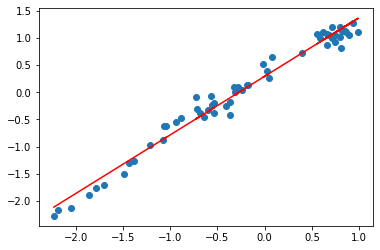

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, CO2_intercept + CO2_coeff * X_train, 'r')
plt.show()

**Visualizing the fit on the test set**

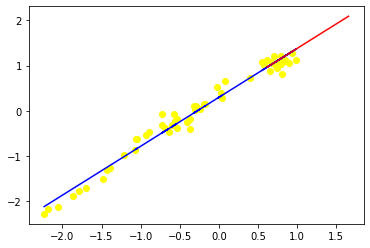

In [ ]:
plt.clf()
plt.scatter(X_train,y_train,color='yellow')
plt.plot(X_train, CO2_intercept + CO2_coeff * X_train, 'b')
plt.plot(X_test, CO2_intercept + CO2_coeff * X_test, 'r')

**Creating the dataframe for output csv**




In [ ]:
inv_df_train = pd.DataFrame(X_train.values,columns = ['Total_Meat_Consumption'])
inv_df_train.insert(1,'y_pred',y_pred_train)
    
inversed_train = scaler.inverse_transform(inv_df_train)
inv_df_test = pd.DataFrame(X_test.values,columns = ['Total_Meat_Consumption'])
inv_df_test.insert(1,'y_pred',y_pred_test)
    
inversed_test = scaler.inverse_transform(inv_df_test)


df_train=pd.DataFrame(data_year['Year'][:-14])
df=pd.DataFrame(data_year['Year'][-14:])

df_train.insert(0, 'Entity', country_name)
df_train.insert(1,'Total_Meat_Consumption',inversed_train[:,[0]],True)
df_train.insert(2,'Total_CO2_emission',inversed_train[:,[1]],True)
df.insert(0, 'Entity', country_name)
df.insert(1,'Total_Meat_Consumption',inversed_test[:,[0]],True)
df.insert(2,'Total_CO2_emission',inversed_test[:,[1]],True)
df

,Entity,Total_Meat_Consumption,Total_CO2_emission,Year
1394,Canada,3.069805e+09,5.592559e+08,2018
1395,Canada,3.111521e+09,5.681028e+08,2019
1396,Canada,3.154481e+09,5.772136e+08,2020
1397,Canada,3.198103e+09,5.864646e+08,2021
1398,Canada,3.242325e+09,5.958430e+08,2022
1399,Canada,3.287147e+09,6.053487e+08,2023
1400,Canada,3.332577e+09,6.149833e+08,2024
1401,Canada,3.378623e+09,6.247485e+08,2025
1402,Canada,3.425293e+09,6.346460e+08,2026
1403,Canada,3.472595e+09,6.446777e+08,2027


**- We need an evaluation metric in order to compare our predictions with the actual values.**

In [ ]:
#So lets again split our train and test using only X_train and y_train
X_train = X_train[:-10]
X_test = X_train[-10:]
y_train = y_train[:-10]
y_test = y_train[-10:]

In [ ]:
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

<a id=section5></a>

### 5.5 Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>

Below are the types of error we will be calculating for our _linear regression model_:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

<a id=section501></a>

#### 5.5.1 Model Evaluation using __metrics.__

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our Total_CO2_emission predictions

In [ ]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [ ]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.11913341213607154
MAE for test set is 0.0712630849719467


__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Total_CO2_emission predictions

In [ ]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [ ]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.021775399755497967
MSE for test set is 0.00784996858625792


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Total_CO2_emission predictions

In [ ]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [ ]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.147564900147352
RMSE for test set is 0.08860004845516688


Comparing these metrics:

- __MAE__ is the easiest to understand, because it's the __average error.__ 
- __MSE__ is more popular than MAE, because MSE "punishes" larger errors.
- __RMSE__ is even more popular than MSE, because RMSE is _interpretable_ in the "y" units.
    - Easier to put in context as it's the same units as our response variable.

<a id=section502></a>

#### 5.5.2 Model Evaluation using Rsquared value.

- There is one more method to evaluate linear regression model and that is by using the __Rsquared__ value.<br/>
- R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

- R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. But there is one shortcoming of Rsquare method and that is **R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting).

In [ ]:
feature_cols = ['Total_Meat_Consumption']                                                          # create a Python list of feature names
X = data[feature_cols][:-14]  
y = data.Total_CO2_emission[:-14]

X_train, X_test, y_train, y_test = X[:-10],X[-10:],y[:-10],y[-10:]

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)


In [ ]:
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

[0.97665498] [0.97613621]


In [ ]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

[-2.90127134] [-3.38893025]


<a id=section6></a>

### 6. Predicting __Total_Land_use__

### 6.1 Preparing X and y using pandas

In [ ]:
data = data_bkup.copy()
data = data.drop(["Entity","Total_population",	"Total_CO2_emission","Total_water_use"], axis = 1)
data.head()

,Total_Meat_Consumption,Total_land_use
171,1.433739e+09,6674.044257
172,1.459121e+09,6718.337647
173,1.536277e+09,6955.026520
174,1.647432e+09,7349.346522
175,1.688008e+09,7688.555128


In [ ]:
scaler = StandardScaler().fit(data)
data1 = scaler.transform(data)
data = pd.DataFrame(data1)
data.tail()

,0,1
66,1.315841,NaN
67,1.399288,NaN
68,1.483866,NaN
69,1.569590,NaN
70,1.656474,NaN


In [ ]:
data.columns = ['Total_Meat_Consumption','Total_land_use']
data.head()

,Total_Meat_Consumption,Total_land_use
0,-2.232862,-0.028328
1,-2.188685,0.014191
2,-2.054391,0.241402
3,-1.860922,0.619930
4,-1.790298,0.945555


In [ ]:
feature_cols = ['Total_Meat_Consumption']              
X = data[feature_cols]
print(type(X))
print(X.shape)     

<class 'pandas.core.frame.DataFrame'>
(71, 1)


In [ ]:
y = data.Total_land_use
y.head()

0   -0.028328
1    0.014191
2    0.241402
3    0.619930
4    0.945555
Name: Total_land_use, dtype: float64

In [ ]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(71,)


### 6.2 Splitting X and y into training and test datasets.

In [ ]:
X_train = X[:-14]
X_test = X[-14:]
y_train = y[:-14]
y_test = y[-14:]

In [ ]:
#X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (57, 1)
y_train shape:  (57,)

Test cases as below
X_test shape:  (14, 1)
y_test shape:  (14,)


### 6.3 Performing Linear Regression

In [ ]:
X = data['Total_Meat_Consumption']
y = data.Total_land_use
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
linreg = linear_reg(X,y)

### 6.4 Interpreting Model Coefficients

In [ ]:
print('Intercept:',linreg.intercept_)                                           # print the intercept 
print('Coefficients:',linreg.coef_)

land_intercept = linreg.intercept_[0]
land_coeff = linreg.coef_[0][0]

Intercept: [-0.20794351]
Coefficients: [[-0.75526836]]


__y = 0.69900332 + 1.75430078 `*` Total_land_use__

How do we interpret the Total_Meat_Consumption coefficient (1.7543)

A "unit" increase in Total_Meat_Consumption is associated with a "1.7543 unit" increase in Total_land_use.

### 6.5 Using the Model for Prediction

In [ ]:
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

**Visualizing the fit on the train set**

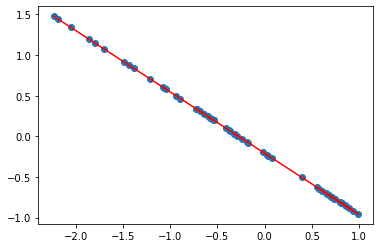

In [ ]:
plt.scatter(X_train, y_pred_train)
plt.plot(X_train, land_intercept + land_coeff * X_train, 'r')
plt.show()

**Visualizing the fit on the test set**

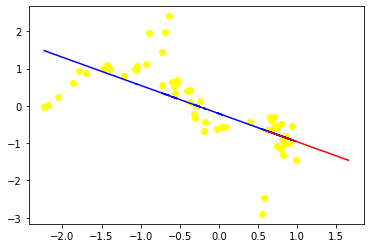

In [ ]:
plt.clf()
plt.scatter(X_train,y_train,color='yellow')
plt.plot(X_train, land_intercept + land_coeff * X_train, 'b')
plt.plot(X_test, land_intercept + land_coeff * X_test, 'r')

**Inserting into the dataframe for output csv**

In [ ]:
inv_df_train = pd.DataFrame(X_train.values,columns = ['Total_Meat_Consumption'])
inv_df_train.insert(1,'y_pred',y_pred_train)
    
inversed_train = scaler.inverse_transform(inv_df_train)
    
inv_df_test = pd.DataFrame(X_test.values,columns = ['Total_Meat_Consumption'])
inv_df_test.insert(1,'y_pred',y_pred_test)
    
inversed_test = scaler.inverse_transform(inv_df_test)

df_train.insert(3, 'Total_land_use', inversed_train[:,[1]],True)
df.insert(3, 'Total_land_use', inversed_test[:,[1]],True)
df.head()

,Entity,Total_Meat_Consumption,Total_CO2_emission,Total_land_use,Year
1394,Canada,3.069805e+09,5.592559e+08,6003.249543,2018
1395,Canada,3.111521e+09,5.681028e+08,5946.123388,2019
1396,Canada,3.154481e+09,5.772136e+08,5887.293020,2020
1397,Canada,3.198103e+09,5.864646e+08,5827.557227,2021
1398,Canada,3.242325e+09,5.958430e+08,5766.999095,2022


In [ ]:
#So lets again split our train and test using only X_train and y_train, as we need to evaluate the model
X_train = X_train[:-10]
X_test = X_train[-10:]
y_train = y_train[:-10]
y_test = y_train[-10:]

In [ ]:
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

### 6.6 Model evaluation 

#### 6.6.1 Computing the **MAE** for Total_land_use predictions

In [ ]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.46688658859335735
MAE for test set is 0.24208669864100588


#### 6.6.2 Computing the **MSE** for Total_land_use predictions

In [ ]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.4394371168794183
MSE for test set is 0.08008264133752786


#### 6.6.3 Computing the **RMSE** for Total_land_use predictions

In [ ]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.662900533171771
RMSE for test set is 0.2829887653910096


### 6.7 Model Evaluation using Rsquared value.

In [ ]:
feature_cols = ['Total_Meat_Consumption']                                                          # create a Python list of feature names
X = data[feature_cols][:-14]  
y = data.Total_land_use[:-14]

X_train, X_test, y_train, y_test = X[:-10],X[-10:],y[:-10],y[-10:]

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [ ]:
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

[0.27874828] [0.26272046]


In [ ]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

[-1.052644] [-1.3092245]


### 7. Predicting __Total_water_use__

### 7.1 Preparing X and y using pandas

In [ ]:
data = data_bkup.copy()
data = data.drop(["Entity","Total_population",	"Total_CO2_emission","Total_land_use"], axis = 1)
data.head()

,Total_Meat_Consumption,Total_water_use
171,1.433739e+09,796207.67
172,1.459121e+09,798454.81
173,1.536277e+09,824830.00
174,1.647432e+09,873022.29
175,1.688008e+09,897963.20


In [ ]:
scaler = StandardScaler().fit(data)
data1 = scaler.transform(data)
data = pd.DataFrame(data1)
data.tail()

,0,1
66,1.315841,NaN
67,1.399288,NaN
68,1.483866,NaN
69,1.569590,NaN
70,1.656474,NaN


In [ ]:
data.columns = ['Total_Meat_Consumption','Total_water_use']
data.head()

,Total_Meat_Consumption,Total_water_use
0,-2.232862,-0.807119
1,-2.188685,-0.780014
2,-2.054391,-0.461876
3,-1.860922,0.119419
4,-1.790298,0.420257


In [ ]:
feature_cols = ['Total_Meat_Consumption']              
X = data[feature_cols]
print(type(X))
print(X.shape)     

<class 'pandas.core.frame.DataFrame'>
(71, 1)


In [ ]:
y = data.Total_water_use
y.head()

0   -0.807119
1   -0.780014
2   -0.461876
3    0.119419
4    0.420257
Name: Total_water_use, dtype: float64

In [ ]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(71,)


### 7.2 Splitting X and y into training and test datasets.

In [ ]:
X_train = X[:-14]
X_test = X[-14:]
y_train = y[:-14]
y_test = y[-14:]

In [ ]:
#X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (57, 1)
y_train shape:  (57,)

Test cases as below
X_test shape:  (14, 1)
y_test shape:  (14,)


### 7.3 Performing Linear Regression

In [ ]:
X = data['Total_Meat_Consumption']
y = data.Total_water_use
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
linreg = linear_reg(X,y)

### 7.4 Interpreting Model Coefficients

In [ ]:
print('Intercept:',linreg.intercept_)                                           # print the intercept 
print('Coefficients:',linreg.coef_)

water_intercept = linreg.intercept_[0]
water_coeff = linreg.coef_[0][0]

Intercept: [-0.14722435]
Coefficients: [[-0.53473124]]


__y = 0.69900332 + 1.75430078 `*` Total_water_use__

How do we interpret the Total_Meat_Consumption coefficient (1.7543)

A "unit" increase in Total_Meat_Consumption is associated with a "1.7543 unit" increase in Total_water_use.

### 7.5 Using the Model for Prediction

In [ ]:
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

**Visualizing the fit on the train set**

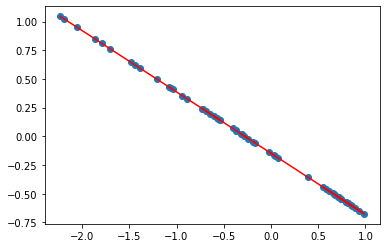

In [ ]:
plt.scatter(X_train, y_pred_train)
plt.plot(X_train, water_intercept + water_coeff * X_train, 'r')
plt.show()

**Visualizing the fit on the test set**

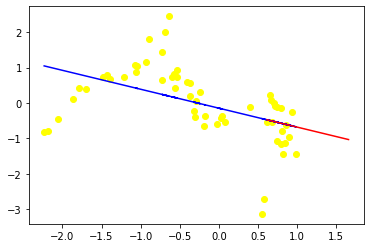

In [ ]:
plt.clf()
plt.scatter(X_train,y_train,color='yellow')
plt.plot(X_train, water_intercept + water_coeff  * X_train, 'b')
plt.plot(X_test, water_intercept + water_coeff  * X_test, 'r')

**Inserting into the dataframe for output csv**

In [ ]:
inv_df_train = pd.DataFrame(X_train.values,columns = ['Total_Meat_Consumption'])
inv_df_train.insert(1,'y_pred',y_pred_train)

inversed_train = scaler.inverse_transform(inv_df_train)


inv_df_test = pd.DataFrame(X_test.values,columns = ['Total_Meat_Consumption'])
inv_df_test.insert(1,'y_pred',y_pred_test)

inversed_test = scaler.inverse_transform(inv_df_test)

df_train.insert(4, 'Total_water_use', inversed_train[:,[1]],True)
df_train

df.insert(4, 'Total_water_use', inversed_test[:,[1]],True)
df

,Entity,Total_Meat_Consumption,Total_CO2_emission,Total_land_use,Total_water_use,Year
1394,Canada,3.069805e+09,5.592559e+08,6003.249543,823662.311694,2018
1395,Canada,3.111521e+09,5.681028e+08,5946.123388,820443.468535,2019
1396,Canada,3.154481e+09,5.772136e+08,5887.293020,817128.599415,2020
1397,Canada,3.198103e+09,5.864646e+08,5827.557227,813762.713030,2021
1398,Canada,3.242325e+09,5.958430e+08,5766.999095,810350.490951,2022
1399,Canada,3.287147e+09,6.053487e+08,5705.618600,806891.931808,2023
1400,Canada,3.332577e+09,6.149833e+08,5643.405950,803386.483856,2024
1401,Canada,3.378623e+09,6.247485e+08,5580.350088,799833.524113,2025
1402,Canada,3.425293e+09,6.346460e+08,5516.439679,796232.413817,2026
1403,Canada,3.472595e+09,6.446777e+08,5451.663217,792582.504763,2027


In [ ]:
#So lets again split our train and test using only X_train and y_train, as we need to evaluate the model
X_train = X_train[:-10]
X_test = X_train[-10:]
y_train = y_train[:-10]
y_test = y_train[-10:]

In [ ]:
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

### 7.6 Model evaluation 

#### 7.6.1 Computing the **MAE** for Total_water_use predictions

In [ ]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.5924386989884721
MAE for test set is 0.38449620548594077


#### 7.6.2 Computing the **MSE** for Total_water_use predictions

In [ ]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.6107176147868358
MSE for test set is 0.1903668674908041


#### 7.6.3 Computing the **RMSE** for Total_water_use predictions

In [ ]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.7814842383483085
RMSE for test set is 0.4363105172819057


### 7.7 Model Evaluation using Rsquared value.

In [ ]:
feature_cols = ['Total_Meat_Consumption']                                                          # create a Python list of feature names
X = data[feature_cols][:-14]  
y = data.Total_water_use[:-14]

X_train, X_test, y_train, y_test = X[:-10],X[-10:],y[:-10],y[-10:]

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [ ]:
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

[-0.12342136] [-0.14838628]


In [ ]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

[-1.40541422] [-1.70609099]


Since we are having high R-squared and adjusted R-squared values, the model is performing well.

**Listing the coeffs**

In [ ]:
list_coeffs = [{'CO2_intercept':CO2_intercept},{'CO2_coeff':CO2_coeff},
                            {'land_intercept':land_intercept},{'land_coeff':land_coeff},
                            {'water_intercept':water_intercept},{'water_coeff':water_coeff}]

reg_dict[country_name] = list_coeffs
print("dict:",reg_dict)

dict: {'Canada': [{'CO2_intercept': 0.29759444661259254}, {'CO2_coeff': 1.0808881252791769}, {'land_intercept': -0.2079435102855897}, {'land_coeff': -0.7552683645644721}, {'water_intercept': -0.1472243471550783}, {'water_coeff': -0.5347312438227796}]}


**Download the output csv file**

In [ ]:
from google.colab import files

if excel == False:
    df_train.to_csv('regression.csv')
    df.to_csv('regression.csv',mode='a', header=False)
    excel = True
else:
    df_train.to_csv('regression.csv',mode='a', header=False)
    df.to_csv('regression.csv',mode='a', header=False)

files.download('regression.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>